In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats
import matplotlib.pyplot as plt
import sqlite3 as sql
import matplotlib.dates as mdates
from matplotlib import style
import scipy.stats as stats
style.use('fivethirtyeight')
import dominance_analysis
import seaborn as sns
import statsmodels.api as sm

In [ ]:
df=pd.read_csv('Python Import.csv')

In [ ]:
df.corr()

In [ ]:
correlation = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Heatmap displaying correlation between features')

In [ ]:
X=df.iloc[:,1:13]
y=df.iloc[:, 0]

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[-1.34110445, -0.89494465, -0.48872641, ..., -0.65986692,
        -1.1469421 , -0.53825181],
       [ 0.74565408, -0.89494465, -0.48872641, ..., -0.65986692,
        -1.1469421 , -0.53825181],
       [-1.34110445, -0.89494465, -0.48872641, ..., -0.65986692,
        -1.1469421 , -0.53825181],
       ...,
       [ 0.74565408, -0.89494465, -0.48872641, ...,  1.51545708,
        -1.1469421 , -0.53825181],
       [ 0.74565408, -0.89494465,  2.04613457, ..., -0.65986692,
         0.87188359, -0.53825181],
       [ 0.74565408,  1.11738754, -0.48872641, ..., -0.65986692,
         0.87188359, -0.53825181]])

In [28]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ 1.49209787, -2.53153429,  1.34051175, ...,  0.0383224 ,
        -0.75665957, -1.28204651],
       [ 1.85988027, -1.80867257,  1.12067123, ...,  0.58509527,
         0.06057587, -0.20542044],
       [ 1.9611143 , -2.18890806,  0.91793367, ...,  0.0373532 ,
        -0.24117515, -0.71215335],
       ...,
       [-1.59950312, -1.44522983, -0.29972644, ...,  0.58825291,
        -0.54219925, -0.62781036],
       [-3.03367245, -1.13570121, -0.02735981, ...,  0.17741554,
        -0.85847082, -0.78059746],
       [-0.05027518,  2.04007631,  0.0682618 , ...,  0.00922513,
        -0.15346616, -0.79533504]])

In [29]:
pca.get_covariance()

array([[ 1.00257732, -0.00197537,  0.03816567,  0.0996188 , -0.06286219,
         0.11182242,  0.18679488, -0.20321672,  0.05577783, -0.12676881,
         0.19510431, -0.00341644],
       [-0.00197537,  1.00257732,  0.08736411,  0.56722785,  0.11083406,
        -0.12192278, -0.05722867,  0.0687972 , -0.06436751,  0.07358051,
        -0.01345821,  0.05512785],
       [ 0.03816567,  0.08736411,  1.00257732,  0.09121944,  0.23298651,
         0.01310864,  0.14272987, -0.13116646,  0.11743792,  0.01775551,
        -0.02122492, -0.0295891 ],
       [ 0.0996188 ,  0.56722785,  0.09121944,  1.00257732,  0.03405181,
        -0.028387  ,  0.08648924, -0.00641989,  0.04690776,  0.01199068,
         0.0750134 ,  0.03340154],
       [-0.06286219,  0.11083406,  0.23298651,  0.03405181,  1.00257732,
        -0.19711461,  0.04221312, -0.24003155,  0.00807998,  0.04075732,
         0.04003208, -0.10667218],
       [ 0.11182242, -0.12192278,  0.01310864, -0.028387  , -0.19711461,
         1.00257732,  

In [30]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.18437414, 0.14021963, 0.11417074, 0.09121033, 0.08650446,
       0.08143859, 0.0698078 , 0.06501793, 0.05518203, 0.0449305 ,
       0.03540801, 0.03173584])

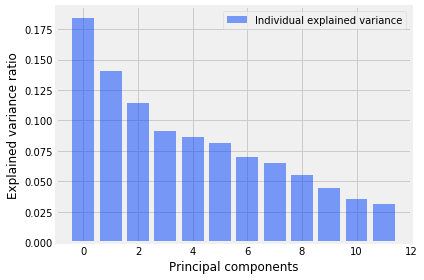

In [54]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(12), explained_variance, alpha=0.5, align='center',
            label='Individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

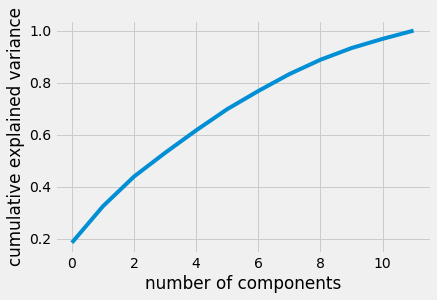

In [32]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Checking Assumptions

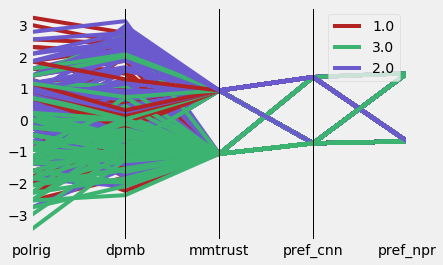

In [91]:
cols = ['polrig', 'dpmb', 'mmtrust', 'pref_cnn','pref_npr']
subset_df = df[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, df['polaff']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'polaff', color=('firebrick', 'mediumseagreen','slateblue'))


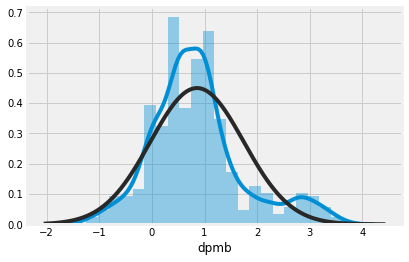

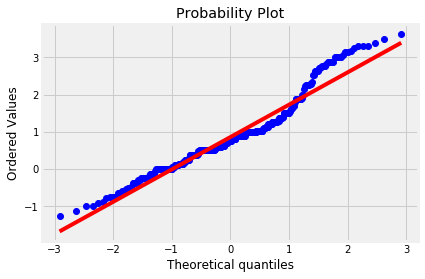

In [34]:
#Normality of Dependent Variable 
from scipy.stats import norm
sns.distplot(df['dpmb'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['dpmb'], plot=plt)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [28]:
pip install multipy

  Stored in directory: /Users/coreyrobinson/Library/Caches/pip/wheels/22/57/d7/b1d6bb0938c60d5dc3ed91785a8fd345cfd9fe32828bf13fd3
Successfully built multipy
Note: you may need to restart the kernel to use updated packages.


In [18]:
sm.stats.multitest.multipletests([0.29390533638582206,0.26726547461213096], alpha=0.05, method='b', is_sorted=False, returnsorted=False)

(array([False, False]),
 array([0.58781067, 0.53453095]),
 0.025320565519103666,
 0.025)

In [111]:
y=df['dpmb']
x1=df['polaff']
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

/Users/coreyrobinson/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dpmb   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.406
Date:                Sat, 03 Aug 2019   Prob (F-statistic):             0.0118
Time:                        16:49:40   Log-Likelihood:                -502.04
No. Observations:                 389   AIC:                             1008.
Df Residuals:                     387   BIC:                             1016.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1748      0.133      8.850      0.000       0.914       1.436
polaff        -0.1624      0.064     -2.531      0.012      -0.288      -0.036
==============================================================================
Omnibus:                       40.593   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.030
Skew:                           0.785   Prob(JB):                     5.03e-12
Kurtosis:                       3.862   Cond. No.                         7.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
from dominance_analysis import Dominance
dominance=Dominance(data=df,target='dpmb',objective=1,top_k=13,data_format=0)

Selecting 13 Best Predictors for the Model
Selected Predictors :  ['sex', 'age', 'race', 'educ', 'polaff', 'polrig', 'mmtrust', 'pref_fox', 'pref_cnn', 'pref_bbc', 'pref_nyt', 'pref_wsj', 'pref_npr']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.5244926811355672



In [94]:
dominance.incremental_rsquare()

100%|██████████| 4/4 [00:00<00:00, 5996.15it/s]

Selecting 5 Best Predictors for the Model
Selected Predictors :  ['polaff', 'polrig', 'mmtrust', 'pref_cnn', 'pref_npr']

Creating models for 31 possible combinations of 5 features :
#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################
#########################  Variable Dominance Calculation Done!!!!!  #########################



{'polaff': 0.008744839312364442,
 'polrig': 0.4412831426183363,
 'mmtrust': 0.04250869491739491,
 'pref_cnn': 0.002878920257039788,
 'pref_npr': 0.005696181867971576}

In [95]:
from IPython.display import IFrame
IFrame(src='http://localhost:8888/notebooks/Desktop/Data%20Analytics/Jupyter%20Notebook/Untitled.ipynb', width=100, height=1000)
dominance.plot_incremental_rsquare()

In [96]:
dominance.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
polrig,0.39226,0.487743,0.442137,0.441283,88.0608
mmtrust,0.000150651,0.0815634,0.043610,0.0425087,8.48288
polaff,0.000435554,0.0162832,0.009002,0.00874484,1.74509
pref_npr,0.00975575,0.00109318,0.005877,0.00569618,1.13671
pref_cnn,0.00501717,0.00109053,0.002762,0.00287892,0.574507


In [35]:
dominance.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
polrig,0.397554,0.487743,0.448918,0.447954,85.407
mmtrust,7.20632e-05,0.0815634,0.046824,0.0459001,8.75133
polaff,0.000588311,0.0162832,0.008862,0.00879603,1.67706
pref_fox,0.0037333,0.000197351,0.004989,0.00452374,0.862499
pref_npr,0.00635519,0.00109318,0.004380,0.00427903,0.815842
pref_nyt,0.00118055,0.000222553,0.003198,0.00281387,0.536494
sex,0.00247397,6.4185e-05,0.002621,0.00241332,0.460124
pref_bbc,0.00385698,1.07546e-07,0.002195,0.00215388,0.41066
pref_cnn,0.00180706,0.00109053,0.001650,0.00161887,0.308654
age,0.00154646,4.14125e-05,0.001741,0.00159488,0.30408


In [36]:
pd.set_option('display.max_colwidth', 200)
dominance.dominance_level()

,Predictors,Generally Dominating,Conditionally Dominating,Completelly Dominating
0,polrig,"[mmtrust, polaff, pref_fox, pref_npr, pref_nyt, sex, pref_bbc, pref_cnn, age, race, educ, pref_wsj]","[mmtrust, polaff, pref_fox, pref_npr, pref_nyt, sex, pref_bbc, pref_cnn, age, race, educ, pref_wsj]","[mmtrust, polaff, pref_fox, pref_npr, pref_nyt, sex, pref_bbc, pref_cnn, age, race, educ, pref_wsj]"
1,mmtrust,"[polaff, pref_fox, pref_npr, pref_nyt, sex, pref_bbc, pref_cnn, age, race, educ, pref_wsj]",,
2,polaff,"[pref_fox, pref_npr, pref_nyt, sex, pref_bbc, pref_cnn, age, race, educ, pref_wsj]",,
3,pref_fox,"[pref_npr, pref_nyt, sex, pref_bbc, pref_cnn, age, race, educ, pref_wsj]",,
4,pref_npr,"[pref_nyt, sex, pref_bbc, pref_cnn, age, race, educ, pref_wsj]",,
5,pref_nyt,"[sex, pref_bbc, pref_cnn, age, race, educ, pref_wsj]",,
6,sex,"[pref_bbc, pref_cnn, age, race, educ, pref_wsj]",,
7,pref_bbc,"[pref_cnn, age, race, educ, pref_wsj]",,
8,pref_cnn,"[age, race, educ, pref_wsj]",,
9,age,"[race, educ, pref_wsj]",,


In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)

In [34]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))

R squared: 0.5181374871474131


In [38]:
from scipy.stats import ttest_ind
rep = df.loc[df['polaff'] == 1, :] # define a hot_cereal df
dem = df.loc[df['polaff'] == 2, :] # definte a cold_cereal df

In [39]:
ttest_ind(rep['polrig'], dem['polrig'], equal_var = False)

Ttest_indResult(statistic=-1.0531394627263952, pvalue=0.29390533638582206)

In [59]:
reprig = rep['polrig']
demrig = dem['polrig']
repdpmb = rep['dpmb']
demdpmb = dem['dpmb']

In [65]:
#political rigidity mean & SD
print(reprig.describe())
print(demrig.describe())

count    105.000000
mean       3.713905
std        0.825217
min        1.830000
25%        3.330000
50%        3.670000
75%        4.250000
max        6.000000
Name: polrig, dtype: float64
count    199.000000
mean       3.808492
std        0.560940
min        1.670000
25%        3.330000
50%        3.830000
75%        4.170000
max        5.670000
Name: polrig, dtype: float64


In [66]:
print(repdpmb.describe())
print(demdpmb.describe())

count    105.000000
mean       0.874286
std        0.916344
min       -1.130000
25%        0.200000
50%        0.750000
75%        1.250000
max        3.300000
Name: dpmb, dtype: float64
count    199.000000
mean       0.995930
std        0.887844
min       -1.000000
25%        0.500000
50%        0.880000
75%        1.275000
max        3.630000
Name: dpmb, dtype: float64


In [27]:
ttest_ind(rep['dpmb'], dem['dpmb'], equal_var = False)

Ttest_indResult(statistic=-1.1123934875336792, pvalue=0.26726547461213096)

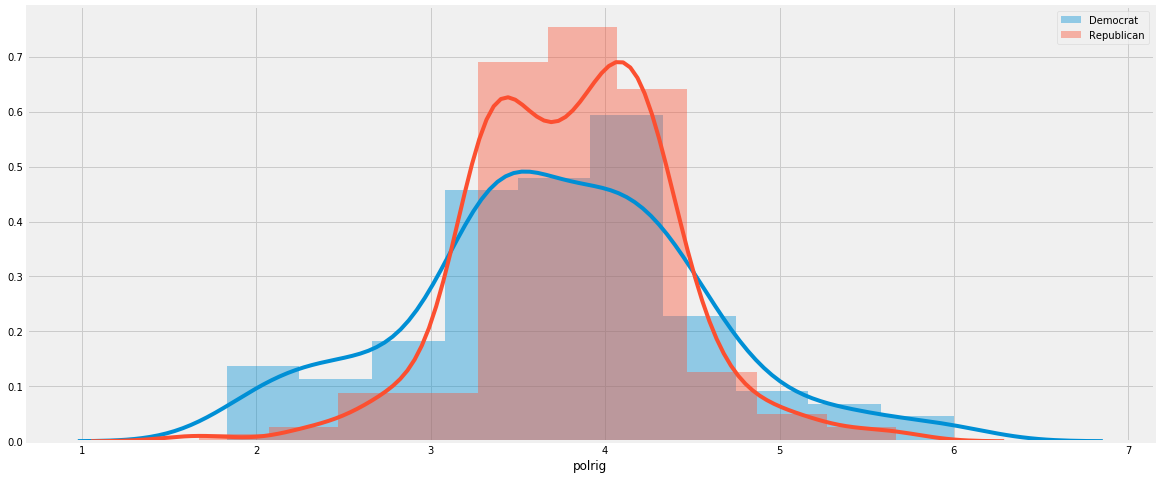

In [40]:
ax = plt.subplots(figsize=(18,8)) # make our plot larger
# plot the cold cereal sugar distribution
sns.distplot(rep['polrig'], bins = 10, hist = True,  label = 'Democrat')
# plot the hot cereal sugar distribution
sns.distplot(dem['polrig'], bins = 10, hist = True, label = 'Republican') 
plt.legend() #show legend

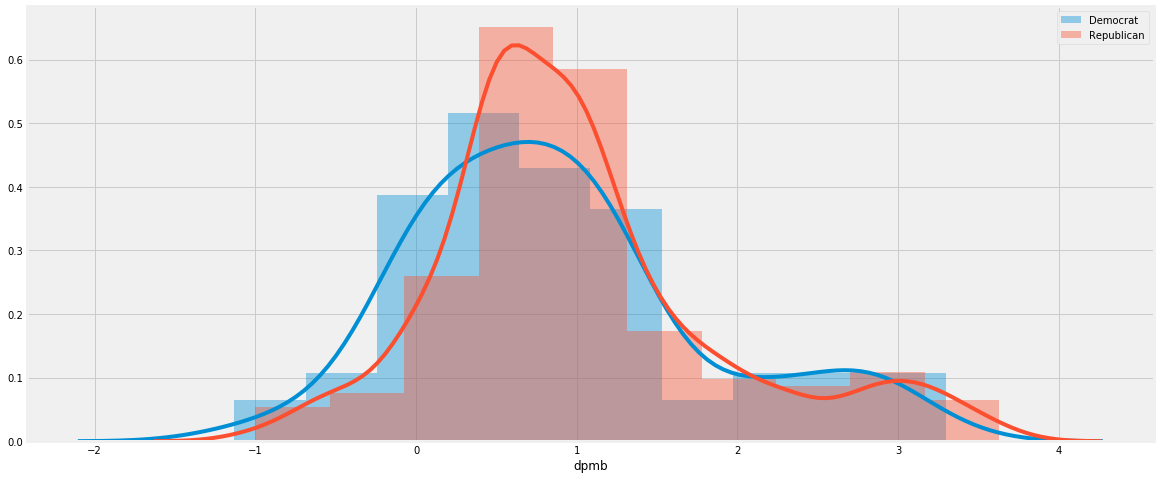

In [55]:
ax = plt.subplots(figsize=(18,8)) # make our plot larger
# plot the cold cereal sugar distribution
sns.distplot(rep['dpmb'], bins = 10, hist = True,  label = 'Democrat')
# plot the hot cereal sugar distribution
sns.distplot(dem['dpmb'], bins = 10, hist = True, label = 'Republican') 
plt.legend() #show legend